In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('questions.csv')

In [3]:
df.shape

(404351, 6)

In [4]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
376941,376941,737356,737357,How can I send original high quality photos on...,Can you send me a photo of your colourful eyes?,0
233151,233151,459357,459358,How can I learn English well？?,What I do if Iwant to learn English well?,1
186480,186480,368227,368228,How do I lose 30 kilos fast?,How can I lose body fat fast?,1
331609,331609,650261,650262,What do Pakistanis think about Myanmar?,What does Pakistanis think about this?,0
256143,256143,504167,504168,Which beloved historical figure would be despi...,I have been offered a job position as an ops d...,0
397955,397955,777576,777577,Cinema choopistha mama song meaning in hindi o...,How do I make sure I do not forget my close fr...,0
70538,70538,140201,140202,How do you replace your brake lever hoods?,How do I connect one lever with two front disc...,0
375011,375011,733683,733684,What distinguishes Marlboro Red cigarettes fro...,What are the best Marlboro cigarettes?,0
354399,354399,694137,44866,Which country owns the Moon?,Does anyone own the Moon?,0
229240,229240,451752,451753,What is the best way to do mediation?,What is the best way to mediate?,1


In [8]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
#duplicate rows
df.duplicated().sum()

0

In [10]:
#counts of duplicated and non duplicated questions
df.is_duplicate.value_counts()

0    255045
1    149306
Name: is_duplicate, dtype: int64

<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

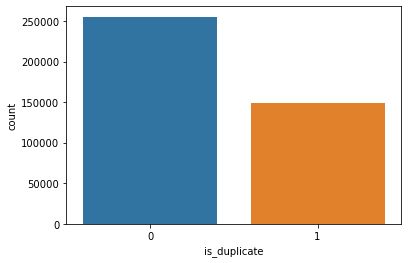

In [11]:
sns.countplot(df.is_duplicate)

In [12]:
#Repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("No of unique questions are ",np.unique(qid).shape[0])

No of unique questions are  789801


In [13]:
x=qid.value_counts()>1
print('No of questions getting repeated',x[x].shape[0])

No of questions getting repeated 13698


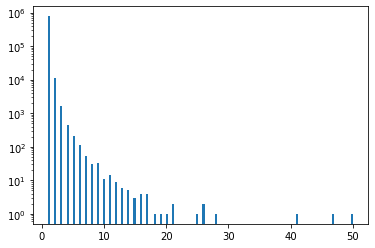

In [14]:
#histogram of repeated questions

plt.hist(qid.value_counts().values,bins=150)
plt.yscale('log')
plt.show()

# Observation

1.Dataset consist of more than 4 lakh data points.
2.There is 1 missing value in question1 and 2 in question2.
3.There are 789801 uniques questions and 13698 question which gets repeated.
4.There are questions which gets repeated 50 times.

In [18]:
new_df = df.sample(30000,random_state=2)

In [19]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0


In [20]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [21]:
new_df.duplicated().sum()

0

In [24]:
print(new_df['is_duplicate'].value_counts())

0    18918
1    11082
Name: is_duplicate, dtype: int64


<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

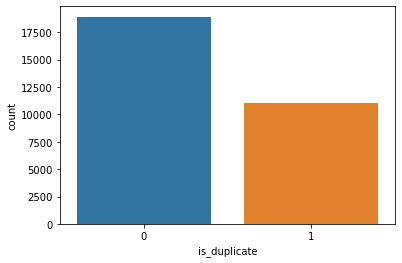

In [34]:
sns.countplot(new_df['is_duplicate'])

In [38]:
#Repeated questions
qid1 = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print("No of unique questions are ",np.unique(qid1).shape[0])
x1=qid1.value_counts()>1
print('No of questions getting repeated',x1[x1].shape[0])

No of unique questions are  59795
No of questions getting repeated 176


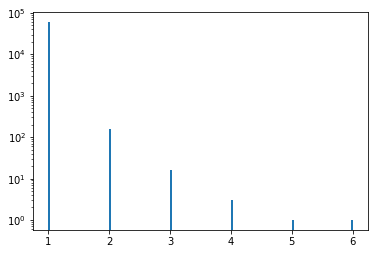

In [39]:
plt.hist(qid1.value_counts().values,bins=150)
plt.yscale('log')
plt.show()

In [41]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [42]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39


In [43]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row:len(row.split(' ')))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row:len(row.split(' ')))

In [44]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8


In [45]:
def common_words(row):
    w1=set(map(lambda word:word.lower().strip(), row['question1'].strip(" ")))
    w2=set(map(lambda word:word.lower().strip(), row['question2'].strip(" ")))
    return len(w1 & w2)

In [46]:
new_df['words_common'] = new_df.apply(common_words,axis=1)

In [47]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,17
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,20
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,33
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,20
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,16


In [48]:
def total_words(row):
    w1=set(map(lambda word:word.lower().strip(), row['question1'].strip(" ")))
    w2=set(map(lambda word:word.lower().strip(), row['question2'].strip(" ")))
    return (len(w1) + len(w2))

In [49]:
new_df['words_total'] = new_df.apply(total_words,axis=1)

In [50]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,words_total
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,17,37
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,20,44
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,33,66
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,20,41
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,16,36


In [51]:
new_df['word_share'] = round(new_df['words_common']/new_df['words_total'],2)

In [52]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,words_total,word_share
339499,339499,665522,665523,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?,1,58,42,11,8,17,37,0.46
289521,289521,568878,568879,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...,0,52,105,11,22,20,44,0.45
4665,4665,9325,9326,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...,0,125,124,24,24,33,66,0.50
54203,54203,107861,107862,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...,1,45,60,8,10,20,41,0.49
132566,132566,262554,91499,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?,0,54,39,11,8,16,36,0.44


Minimum no of characters : 2
Maximum no of characters : 332
Average no of characters : 59.63786666666667


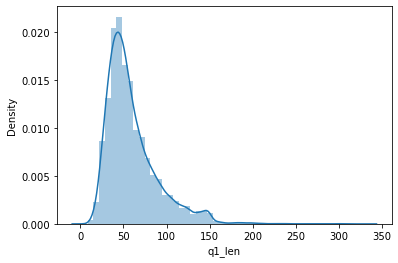

In [56]:
sns.distplot(new_df['q1_len'])
print("Minimum no of characters :",new_df['q1_len'].min())
print("Maximum no of characters :",new_df['q1_len'].max())
print("Average no of characters :",new_df['q1_len'].mean())

Minimum no of characters : 3
Maximum no of characters : 1151
Average no of characters : 59.95153333333333


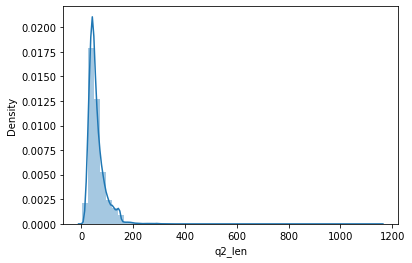

In [58]:
sns.distplot(new_df['q2_len'])
print("Minimum no of characters :",new_df['q2_len'].min())
print("Maximum no of characters :",new_df['q2_len'].max())
print("Average no of characters :",new_df['q2_len'].mean())

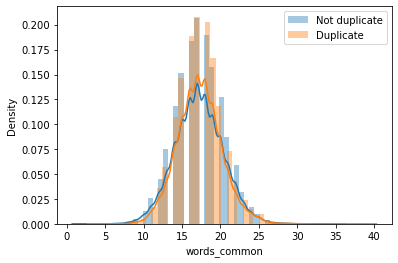

In [61]:
#common words
sns.distplot(new_df[new_df['is_duplicate']==0]['words_common'],label='Not duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['words_common'],label='Duplicate')
plt.legend()
plt.show()

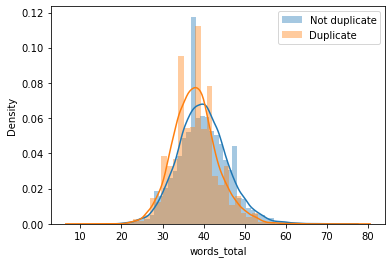

In [62]:
#total words
sns.distplot(new_df[new_df['is_duplicate']==0]['words_total'],label='Not duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['words_total'],label='Duplicate')
plt.legend()
plt.show()

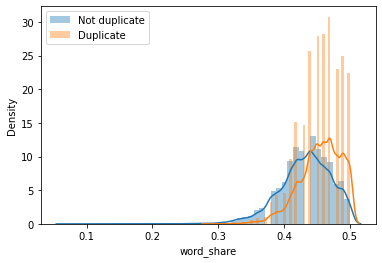

In [63]:
#word share
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='Not duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='Duplicate')
plt.legend()
plt.show()

In [85]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
339499,Why was Cyrus Mistry removed as the Chairman o...,Why did the Tata Sons sacked Cyrus Mistry?
289521,By what age would you think a man should be ma...,When my wrist is extended I feel a shock and b...
4665,How would an arbitrageur seek to capitalize gi...,How would an arbitrageur seek to capitalize gi...
54203,Why did Quora mark my question as incomplete?,Why does Quora detect my question as an incomp...
132566,What is it like working with Pivotal Labs as a...,What's it like to work at Pivotal Labs?


In [86]:
ques_df.shape

(30000, 2)

In [83]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,words_total,word_share
339499,1,58,42,11,8,17,37,0.46
289521,0,52,105,11,22,20,44,0.45
4665,0,125,124,24,24,33,66,0.50
54203,1,45,60,8,10,20,41,0.49
132566,0,54,39,11,8,16,36,0.44


In [84]:
final_df.shape

(30000, 8)

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)

question = list(ques_df['question1']) + list(ques_df['question2'])

In [88]:
q1_arr,q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)

In [89]:
q1_arr.shape

(30000, 3000)

In [90]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)

In [91]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
temp_df.shape

(30000, 6000)

In [93]:
final_df = pd.concat([final_df,temp_df],axis=1)
final_df.shape

(30000, 6008)

In [79]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,words_common,words_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
339499,1,58,42,11,8,17,37,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
289521,0,52,105,11,22,20,44,0.45,0,0,...,0,0,0,0,0,0,0,0,0,0
4665,0,125,124,24,24,33,66,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
54203,1,45,60,8,10,20,41,0.49,0,0,...,0,0,0,0,0,0,0,0,0,0
132566,0,54,39,11,8,16,36,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.7531666666666667

In [103]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.7531666666666667